#**CHAP 4.분류**

##1. 분류의 개요
  * 지도학습의 대표적인 유형
  * 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측
  * 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것
  
## 2. 결정트리
- 직관적으로 이해하기 쉬움
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아냄
- 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 최대한 균일한 데이터 세트를 구성할 수 있도록 분할.
- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

###1) 균일도
### Informataion Gain (정보 이득)
- 엔트로피라는 개념을 기반.
- 엔트로피는 주어진 데이터의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높음 / 같은 값이 섞여 있으면 엔트로피가 낮음
- 1 - 엔트로피
- 정보 이득이 높은 속성을 기준으로 분할

### 지니 계수
- 0이 가장 평등. 1로 갈수록 불평등
- 다양한 값을 가질수록 평등. 특정 값으로 쏠릴수록 불평등
- 1로 갈수록 균일도가 높음.
- 지니 계수가 높은 속성을 기준으로 분할

## 분할 절차
- 1. 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인
- 2-1. True 리프 노드로 만들어서 분류 결정
- 2-2. else 데이터를 분할하는 데 가장 좋은 속성과 분할 기준으로 찾음
- 3. 해당 속성과 분할 기준으로 데이터 분할하여 Branch 노드 생성
- 4. Recursive하게 모든 데이터의 집합의 분류가 결정될 때까지 수행

## 장점
- 쉽다. 직관적이다.
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

## 단점
- 서브 트리를 계속 만들다 보면, 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고, 복잡해짐
- 실제 데이터에서 유연하게 대처할 수 없어서 예측 성능이 떨어질 수 밖에...
- overfitting
- 트리의 크기를 사전에 제한하는 것이 오히려 성능에 좋음

##2) 결정 트리 파라미터

## min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용
- default = 2
- 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
## min_samples_leaf
- 말단 노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_split과 유사하게 과적합 제어 용도.
- imbalanced 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정해야됨
## max_features
- 최적의 분할을 위해 고려할 최대 피처 개수.
- default = None 모든 피처 사용
- int형 : 대상 피처의 개수 / float형 : 대상 피처의 퍼센트
- 'sqrt', 'auto' 피처개수의 root
- 'log' : log2개
## max_depth
- 트리의 최대 깊이
- default = None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 키우며 분할 or 노드가 가지는 데이터 개수가 min_samples_split보다 작아질때까지
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절하게
## max_leaf_nodes
- leaf의 최대개수

# iris example

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

dt = DecisionTreeClassifier(random_state = 156)
iris_data = load_iris()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

## max_depth 제약 없음

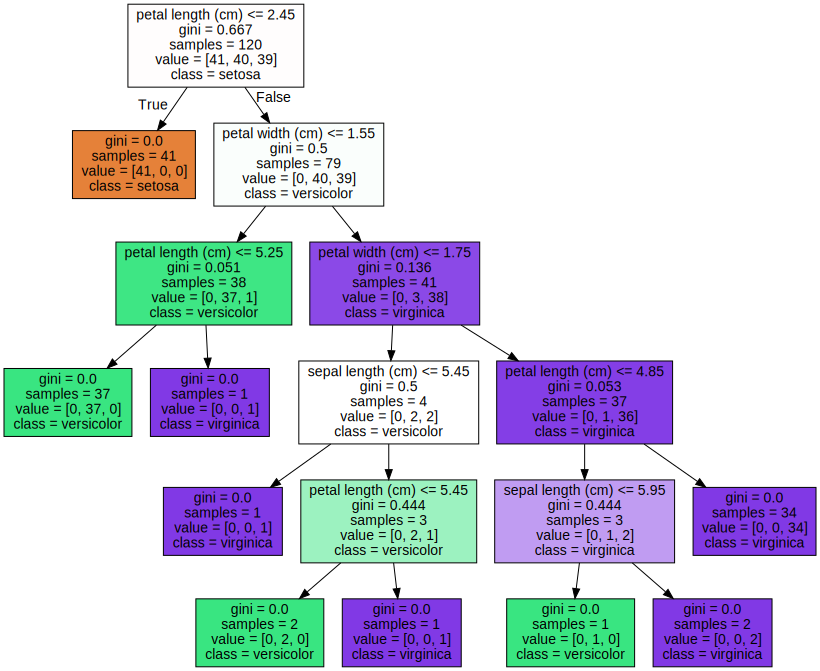

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

- petal length (cm) <= 2.45와 같은 조건은 자식 노드를 만들기 위한 규칙. 없으면, 리프 노드
- gini는 value = [] 로 주어진 데이터 분포에서의 지니계수
- samples는 현 규칙에 해당하는 데이터 건수
- value 합은 samples
- class = setosa 이고, 하위노드를 가질 경우에는 setosa가 제일 많다는 뜻
- 색깔이 짙어질수록 지니 계수가 낮고, 해당 레이블에ㅐ 속하는 샘플 데이터가 많다

In [21]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## max_depth = 3
- 더 간단해짐

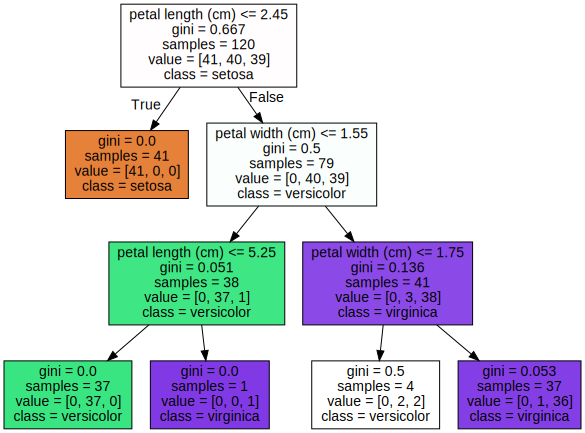

In [22]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 156)
dt.fit(X_train, y_train)

export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [23]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## min_samples_split  =4
- 맨 아래 리프 노드 중 샘플이 3개이지만, 상이한 클래스가 있는 경우가 있다
- 상이한 값이 있어도 min_samples_split값보다 샘플 수가 작기 때문에 더 이상 분할하지 않음

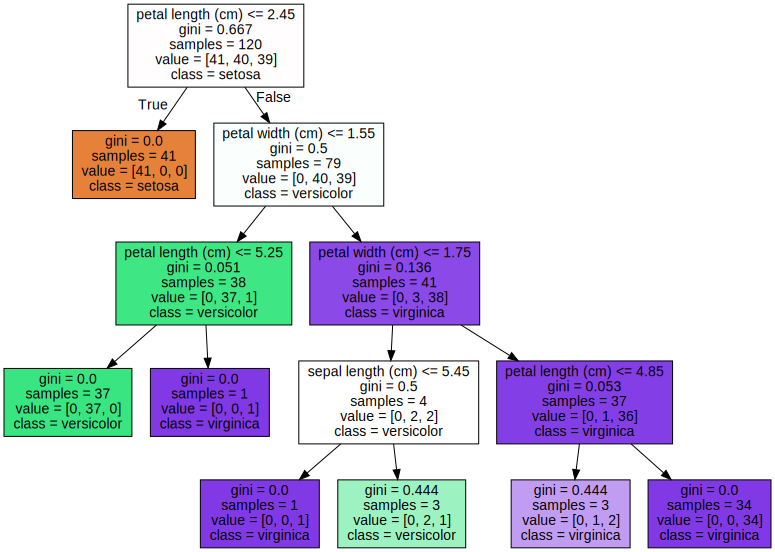

In [24]:
dt = DecisionTreeClassifier(min_samples_split=4, random_state = 156)
dt.fit(X_train, y_train)
export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [25]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## min_samples_leaf = 4
- 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정

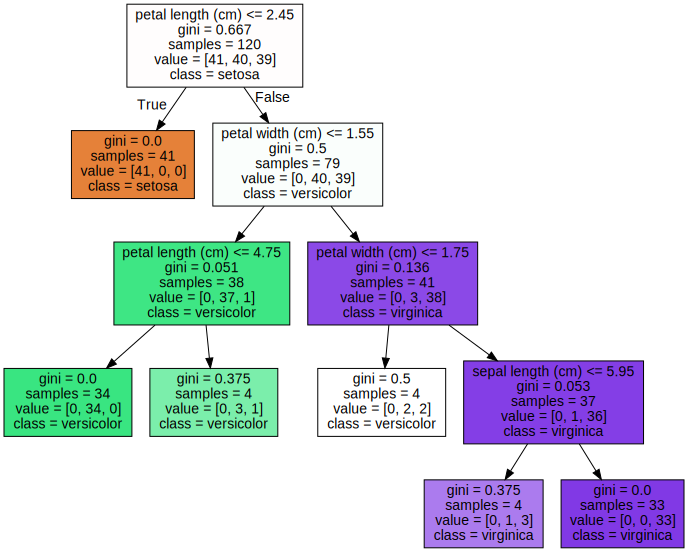

In [26]:
dt = DecisionTreeClassifier(min_samples_leaf=4, random_state = 156)
dt.fit(X_train, y_train)
export_graphviz(dt, out_file = 'tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity = True, filled = True)

import graphviz
with open('tree.dot') as f :
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [27]:
print('accuracy : ', accuracy_score(y_test, dt.predict(X_test)))

accuracy :  0.9333333333333333


## feature importance

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Feature Importance : ', np.round(dt.feature_importances_, 3))

Feature Importance :  [0.033 0.    0.04  0.926]


sepal length (cm) : 0.033
sepal width (cm) : 0.000
petal length (cm) : 0.040
petal width (cm) : 0.926


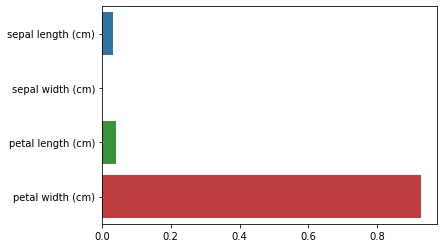

In [29]:
for name, value in zip(iris_data.feature_names, dt.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(dt.feature_importances_, iris_data.feature_names)

# overfitting

In [30]:
#분류를 위한 테스트용 데이터를 쉽게 만들도록
from sklearn.datasets import make_classification

In [31]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

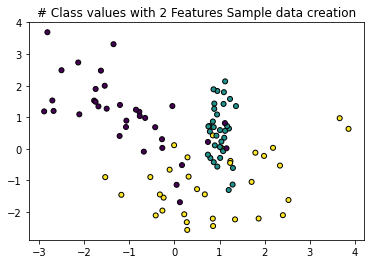

In [32]:
plt.title('# Class values with 2 Features Sample data creation')

#n_clusters_per_class : The number of clusters per class.
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                          n_classes = 3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolors='k')

## default

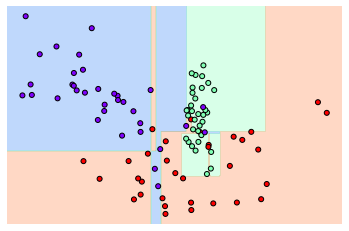

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

- 분할이 자주 일어나서 결정 기준 경계가 매우 많다.
- 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 결정 기준 경계가 많아지고 복잡

## min_samples_leaf = 6

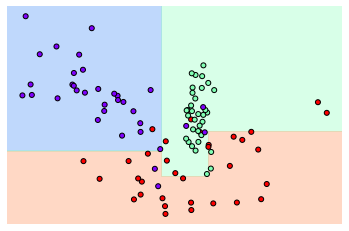

In [34]:
dt = DecisionTreeClassifier(min_samples_leaf=6)
dt.fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

- 좀 더 일반화된 분류 규칙에 따라 분류됨.

##**3. 앙상블 학습**

##1) 앙상블 학습 개요
  * 앙상블 학습을 통한 분류는 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
  * 보팅, 배깅, 부스팅
    * 보팅, 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    

# Voting
- 서로 다른 알고리즘을 가진 분류기를 결합
## Hard Voting
- 다수결
## Soft Voting
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값으로 보팅
- 일반적으로 소프트 보팅 사용
## VotingClassfier()
- input : estimators, voting

In [35]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- breast cancer data사용한 예제
- logistic, KNN을 기반으로 한 보팅 분류기

In [36]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [37]:
lr = LogisticRegression(solver = 'newton-cg')
knn = KNeighborsClassifier()

vote_clf = VotingClassifier(estimators=[('LR',lr), ('KNN', knn)], voting = 'soft')

X_train ,X_test, y_train ,y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

In [38]:
vote_clf.fit(X_train ,y_train)
pred = vote_clf.predict(X_test)

print('Voting classifer accuracy : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting classifer accuracy : 0.9561


In [39]:
#개별 모델과의 비교

classifiers = [vote_clf, lr, knn]

for  classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

VotingClassifier 정확도 : 0.9561
LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9035


##**4. 랜덤 포레스트**

## Bagging
- Bootstrapping Aggregating
- 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정.
- 각각의 분류기가 같지만, 데이터 샘플링을 서로 다르게 학습
- 데이터 중첩을 허용. 복원 추출(with replacement)

## randomforest
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정.
- subset dataet 은 부트스트래핑 방식으로 데이터가 임의로 만들어짐
- subset 은 데이터 건수는 전체 데이터 건수와 동일하지만, 중첩되어짐. (with replacement)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None, names=['colum_index','colum_name'])
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출',feature_name[:10])

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                              columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
  if x[1]>0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

def get_human_dataset() :
    feature_name_df = pd.read_csv('features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
    
    new_feature_name_df=get_new_feature_name_df(feature_name_df)

    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('X_test.txt', sep = '\s+', names = feature_name)
    
    y_train = pd.read_csv('y_train.txt', sep = '\s+', names = ['action'], header = None)
    y_test = pd.read_csv('y_test.txt', sep = '\s+', names = ['action'], header = None)
    
    return X_train, X_test, y_train,y_test


X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))

전체 피처명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


ValueError: ignored

### hyperparameter tuning
- n_estiamtors(default = 10) : 결정 트리의 개수를 지정. 많이 설정할수록 좋은 성능을 기대할 수 있지만, 무조건 향상되는 것은 아님. 학습시간도 오래 걸림
- max_features(default = 'sqrt') : 전체 피처가 아닌 전체 피터 개수의 루트만큼 참조
- max_depth, min_samples_leaf

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, n_jobs = -1, )
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f} : '.format(grid_cv.best_score_))

NameError: ignored

In [ ]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                            min_samples_split=8, random_state=0, n_jobs=-1)

rf1.fit(X_train, y_train)
pred = rf1.predict(X_test)

print('accuracy {0:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
rf2 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8,
                            min_samples_split=8, random_state=0, n_jobs=-1)

rf2.fit(X_train, y_train)
pred = rf2.predict(X_test)

print('accuracy {0:.4f}'.format(accuracy_score(y_test, pred)))

### features importance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
grid_cv.best_params_

In [ ]:
best_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=8,
                                 n_estimators=150, random_state=0, n_jobs = -1)
best_rf.fit(X_train, y_train)

ftr_importance = pd.Series(best_rf.feature_importances_, index = X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Featrue Importance TOP 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

##**5. GBM(Gradient Boosting Machine)**

# Boosting
- 여러 개의 분류기를 순차적으로 학습.
- 앞에서 학습한 분류기각 틀렸을 경우, 올바르게 예측할 수 있도록 가중치 부여
- Adaboost, GBM, XGBoost, LightGBM

## GBM
- 일반적으로 GBM이 랜덤포레스트보다 성증이 뛰어나다.
- 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝도 필요하다

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM accuracy : {0:.4f}'.format(gb_accuracy))
print('GBM time : {0} sec'.format(start_time - time.time()))

GBM accuracy : 0.9561
GBM time : -1.632014513015747 sec


### hyperparameter tuning
- loss(default : deviance) : loss function 지정.
- learning_rate(default : 0.1) : n_estiamtors와 상호 보완적으로 종합. learning_rate를 작게 하고 , n_estimators를 크게 하면 성능이 좋아지지만, 너무 오래걸림.
- n_estimators(default : 100) : weak learner의 개수
- subsample(default : 1) : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 과적합이 우려되면 1보다 작은 값 사용(0.5이면, 데이터의 절반만 학습한다는 뜻)

In [58]:
from sklearn.model_selection import  GridSearchCV

params = {
    'n_estimators' : [100,500], #the number of weak learners
    'learning_rate' : [0.05,0.1]
    
}

grid_cv = GridSearchCV(gb, param_grid=params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터 :  {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9517


In [59]:
#predict with best hyperparmaeters
gb_pred = grid_cv.best_estimator_.predict(X_test)
print('GBM 정확도 : {0:.4f}'.format(accuracy_score(y_test, gb_pred)))

GBM 정확도 : 0.9737
